Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.0793
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0622
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0609
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0583
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0572
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0576
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0590
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 11/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0570
Epoch 12/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0630
Epoch 13/100
25/25 [=================

C:\Users\SUJAN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


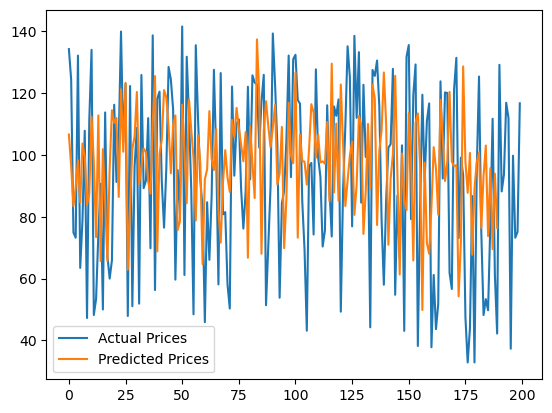

1058.7864284206735

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load your stock price data (replace 'your_data.csv' with your actual file)
data = np.random.randint(50, 150, size=1000) + np.cumsum(np.random.normal(0, 1, size=1000))
data = pd.DataFrame(data, columns=['Close'])
# Define a function to prepare data for CNN
def prepare_data_cnn(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Define a function to prepare data for SVR
def prepare_data_svr(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length].flatten())
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Set sequence length and split the data into training and test sets
sequence_length = 10
train, test = train_test_split(data['Close'].values, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Prepare data for CNN
X_train_cnn, y_train_cnn = prepare_data_cnn(train_scaled, sequence_length)
X_test_cnn, y_test_cnn = prepare_data_cnn(test_scaled, sequence_length)

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=640, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse')

# Train CNN model
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=32)

# Make predictions using the CNN model on test data
cnn_test_predictions = cnn_model.predict(X_test_cnn)

# Flatten the CNN test predictions for SVR input
cnn_test_predictions_flat = cnn_test_predictions.flatten()

# Prepare data for SVR
X_train_svr, y_train_svr = prepare_data_svr(train_scaled, sequence_length)
X_test_svr, y_test_svr = prepare_data_svr(test_scaled, sequence_length)

# Build SVR model
svr_model = SVR(kernel='rbf')

# Train the SVR model on CNN predictions
svr_model.fit(X_train_svr, y_train_svr)

# Make predictions using SVR model on CNN test predictions
final_predictions = svr_model.predict(X_test_svr)

# Inverse transform the scaled data to get actual values
actual_values = scaler.inverse_transform(test_scaled.reshape(-1, 1)).flatten()
final_predictions = scaler.inverse_transform(final_predictions.reshape(-1, 1)).flatten()

# Calculate and print the Mean Squared Error (MSE) as an evaluation metric
mse = mean_squared_error(actual_values[:190], final_predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Plotting (you can use your preferred plotting library)
import matplotlib.pyplot as plt

plt.plot(actual_values, label='Actual Prices')
plt.plot(final_predictions, label='Predicted Prices')
plt.legend()
plt.show()
mse

In [31]:
actual_values

array([134.14728782, 124.30514135,  74.89246123,  73.2039459 ,
       132.05807748,  63.45618528,  79.00349192, 107.77755648,
        47.26575425, 111.17857809, 133.92205108,  48.2381769 ,
        53.4192184 ,  74.31677242,  90.61258834,  50.01777357,
       113.69631109,  67.22436032,  59.99577551,  65.99465235,
       116.17135971,  91.22714299, 105.15914513, 139.84502378,
       103.92976803, 122.93468972,  47.91731112, 122.23192601,
        51.09492192,  96.35153552, 108.70917761,  51.91296392,
       125.78388721,  89.24117026,  91.66710205, 111.85795475,
        69.80915464, 138.59013124,  56.2995751 , 118.1003166 ,
       120.41025134,  91.30661261,  76.46671095,  95.71770767,
       128.40967614, 124.35358717, 114.69671644,  59.66749127,
        95.05132155,  80.78900046, 141.4703546 ,  61.15725794,
       131.69263369, 112.60958239,  88.77850467,  48.46160769,
       135.40903926, 111.48331837,  92.00773045,  82.81952377,
        45.91471703,  84.67168796,  66.06098489,  86.73

In [32]:
final_predictions

array([106.55349246,  96.41252709,  83.39903348,  89.50530465,
        98.26875567,  84.65204558, 103.66727407,  99.29087399,
        83.85550081,  87.48708528, 112.26209727,  97.66602547,
        73.41246214, 112.73021243,  65.6599956 , 101.83430032,
        84.86261215,  65.70835378,  95.76800973, 114.39433953,
       110.30895978, 111.91443523,  86.390833  , 121.16451363,
       100.99490424, 123.24999505,  62.86458699,  83.47791369,
       101.92976429, 106.04027556, 120.29323733,  90.54627926,
        96.04328317, 102.02173316, 100.96829039,  91.3482192 ,
        87.40873936, 110.3856592 , 125.42709906,  68.79143712,
       100.32626358, 104.80398642, 120.91716448, 118.52689839,
       109.00067083,  94.03846065, 109.72771217, 112.72011433,
        75.68058825,  78.5384086 , 116.22420155, 100.86305607,
        84.3810035 , 117.94413717, 108.11170316,  98.95695956,
        78.77741724, 106.27832779,  97.15606339,  64.66659753,
        92.0610541 ,  95.27061414, 114.13452722,  98.78